In [52]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dropout
import matplotlib as plt
from sklearn.model_selection import train_test_split 

In [4]:
from textblob import TextBlob
import nltk
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\abize\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abize\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
drug = pd.read_csv('Drug.csv')
drug.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...


In [6]:
drug.shape

(2219, 9)

In [7]:
# How many different drugs are there? Can I encode them into varaibles?
drug.Drug.nunique()

# There are too many drugs to encode

# Can I get useful info to use as variables from information
blob = TextBlob(drug['Information'][0])
print(blob.noun_phrases)

# what are different types of conditions?
drug.Condition.unique()

['levofloxacin', 'bacterial infections', 'generic drug', 'average cash price', 'tablet', 'webmdrx', 'medicare', 'webmdrx', 'cash price']


array(['Acute Bacterial Sinusitis', 'adenocarcinoma of pancreas',
       'Atopic Dermatitis', 'back pain', 'Bacterial Conjunctivitis',
       'Bacterial Urinary Tract Infection', 'biliary calculus',
       'chickenpox', 'colorectal cancer', 'depression',
       'diverticulitis of gastrointestinal tract', 'edema',
       'endometriosis', 'fever', 'fibromyalgia', 'flatulence',
       'furunculosis', 'gastroesophageal reflux disease',
       'genital herpes simplex', 'gout', 'hemorrhoids', 'herpes zoster',
       'hypercholesterolemia', 'hypertension', 'impetigo',
       'Infantile Autism', 'Influenza', "meniere's disease",
       'oral candidiasis', 'Pharyngitis due to Streptococcus Pyogenes',
       'prevention of cerebrovascular accident', 'pyelonephritis',
       'scabies', 'Sleepiness Due To Obstructive Sleep Apnea',
       'sore throat', 'vertigo', 'vulvovaginal candidiasis'], dtype=object)

In [8]:
#define values
values = ['RX/OTC','\r\n']
#drop rows that contain any value in the list
drug = drug[drug.Type.isin(values) == False]
# define values
values = ['\r\n']
drug = drug[drug.Indication.isin(values) == False]

In [9]:
drug["Type"].value_counts()
drug['Indication'].value_counts()

On Label     1658
Off Label     451
Name: Indication, dtype: int64

In [10]:
# Convert Type to binary
df_one = pd.get_dummies(drug["Type"])
df_two = pd.concat((df_one, drug), axis=1)
df_two = df_two.drop(["Type"], axis=1)
df_two = df_two.drop(["RX"], axis=1)
drug = df_two.rename(columns={"OTC": "Type"})
drug["Type"].value_counts() # 1 is OTC and 0 is RX



0    1389
1     720
Name: Type, dtype: int64

In [11]:
# Convert Indication to Binary
df_one = pd.get_dummies(drug["Indication"])
df_two = pd.concat((df_one, drug), axis=1)
df_two = df_two.drop(["Indication"], axis=1)
df_two = df_two.drop(["Off Label"], axis=1)
drug = df_two.rename(columns={"On Label": "Indication"}) # 1 is On Label and 0 is Off Label
drug["Indication"].value_counts()

1    1658
0     451
Name: Indication, dtype: int64

In [12]:
drug2 = drug.replace(['Acute Bacterial Sinusitis', 'Bacterial Conjunctivitis', 'Bacterial Urinary Tract Infection', 'furunculosis', 'impetigo','Pharyngitis due to Streptococcus Pyogenes','pyelonephritis'],"bacterial")
drug3 = drug2.replace(['Atopic Dermatitis', 'fibromyalgia', 'gout', 'hemorrhoids',"meniere's disease",'vertigo','back pain','diverticulitis of gastrointestinal tract'],"chronic")
drug4 = drug3.replace(['adenocarcinoma of pancreas', 'colorectal cancer'],"cancer")
drug5 = drug4.replace(['chickenpox', 'genital herpes simplex', 'herpes zoster','Influenza','fever','sore throat'],"virus")
drug6 = drug5.replace(['hypercholesterolemia'],'high_cholestrol')
drug7 = drug6.replace(['hypertension','prevention of cerebrovascular accident'],'high_bp')
drug8 = drug7.replace(['Infantile Autism'],'disability')
drug9 = drug8.replace(['oral candidiasis','vulvovaginal candidiasis'],'fungus')
drug10 = drug9.replace(['flatulence','gastroesophageal reflux disease','Sleepiness Due To Obstructive Sleep Apnea'],'poor_lifestyle')
drug10.Condition.unique()

array(['bacterial', 'cancer', 'chronic', 'biliary calculus', 'virus',
       'depression', 'edema', 'endometriosis', 'poor_lifestyle',
       'high_cholestrol', 'high_bp', 'disability', 'fungus', 'scabies'],
      dtype=object)

In [13]:
# How many conditions do we have?
drug10.Condition.nunique()

14

In [14]:
drug10 = drug10.replace(to_replace ='Reviews', value = '', regex = True)

In [15]:
drug10.isnull().sum()

Indication      0
Type            0
Condition       0
Drug            0
Reviews         0
Effective       0
EaseOfUse       0
Satisfaction    0
Information     0
dtype: int64

In [16]:
drug10.drop('Information', inplace=True, axis=1)

In [17]:
drug10.drop('Drug',inplace=True, axis=1)

In [18]:
drug_columns = drug10.columns

In [19]:
predictors = drug10[drug_columns[drug_columns != 'Satisfaction']]# all columns except Satisfaction
target = drug10['Satisfaction'] # Satisfaction column

In [20]:
predictors.rename(
    columns={"Indication": "on_label", "Type": "OTC"},
    inplace=True,
)

C:\Users\abize\opencv\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
predictors.head()

,on_label,OTC,Condition,Reviews,Effective,EaseOfUse
0,1,0,bacterial,994,2.52,3.01
1,1,0,bacterial,994,2.52,3.01
2,1,0,bacterial,755,2.78,3.00
3,1,0,bacterial,584,3.21,4.01
4,1,0,bacterial,584,3.21,4.01


In [22]:
target = target.round(0)
target.describe()

encoding = {1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           }
labels = ['1', '2', '3', '4', '5']
           
y = target.copy()
y.replace(encoding, inplace=True)
y = to_categorical(y,5)
y

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [23]:
# Continue from here: https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
# Use One hot encode That will convert condition into binary by splitting into columns

# perform one-hot encoding
one_hot_df = pd.get_dummies(predictors['Condition'])

# merge the two dataframes
merged_df = pd.concat([predictors, one_hot_df], axis=1)



merged_df = merged_df.drop('Condition',axis=1)

merged_df.isnull().shape[0]

2109

In [24]:
merged_df = np.asarray(merged_df).astype(np.float32)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(merged_df, y, stratify=y, random_state=42,test_size=0.1)
#validation split will done when fitting the model

In [64]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(6, activation='relu', input_shape=(n_cols,)))
    model.add(Dropout(0.25))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation=None))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])
    return model

In [65]:
n_cols = X_train.shape[1] # number of predictors

In [66]:
# build the model
model = regression_model()

In [67]:
# fit the model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50, verbose=1) # leave 30% of data for validation i.e to test on

Epoch 1/50
60/60 [==============================] - 2s 7ms/step - loss: 5.7973 - accuracy: 0.7235 - val_loss: 0.2461 - val_accuracy: 0.7545
Epoch 2/50
60/60 [==============================] - 0s 3ms/step - loss: 0.9208 - accuracy: 0.7561 - val_loss: 0.1955 - val_accuracy: 0.8000
Epoch 3/50
60/60 [==============================] - 0s 3ms/step - loss: 1.9179 - accuracy: 0.7624 - val_loss: 0.1728 - val_accuracy: 0.7972
Epoch 4/50
60/60 [==============================] - 0s 4ms/step - loss: 0.5116 - accuracy: 0.7665 - val_loss: 0.1725 - val_accuracy: 0.8000
Epoch 5/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2883 - accuracy: 0.7779 - val_loss: 0.1686 - val_accuracy: 0.8000
Epoch 6/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2389 - accuracy: 0.7823 - val_loss: 0.1660 - val_accuracy: 0.8000
Epoch 7/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2142 - accuracy: 0.7867 - val_loss: 0.1643 - val_accuracy: 0.8000
Epoch 8/50
60/60 [==

Text(0.5, 1.0, 'Training and Validation accuracy')

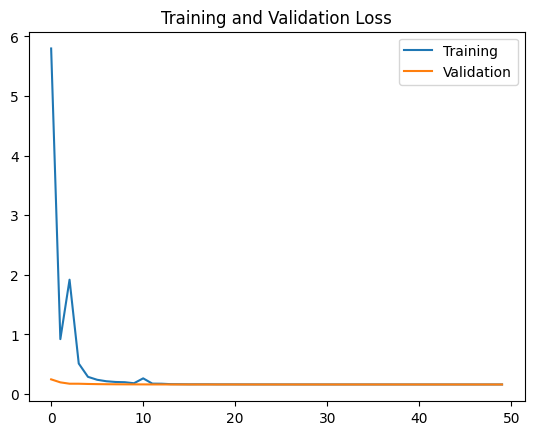

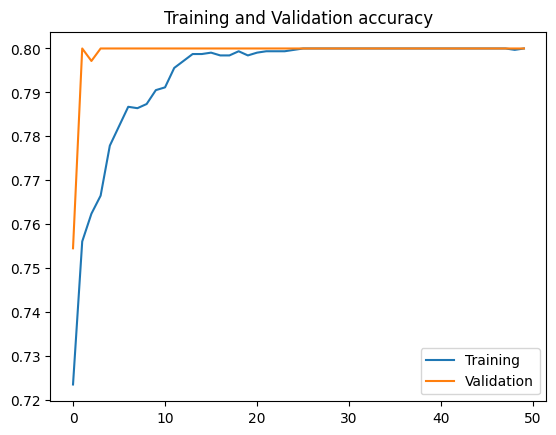

In [68]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.title('Training and Validation Loss')
plt.figure()

plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.title('Training and Validation accuracy')

In [69]:
pred = model.predict(X_test)
pred = to_categorical(pred,5)

7/7 [==============================] - 0s 3ms/step


In [70]:
from sklearn.metrics import classification_report,accuracy_score
print('Test Accuracy: {}'.format(accuracy_score(pred, y_test)))
print(classification_report(y_test, pred, target_names=labels))

Test Accuracy: 0.11848341232227488
              precision    recall  f1-score   support

           1       0.12      1.00      0.21        25
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        62
           4       0.00      0.00      0.00        49
           5       0.00      0.00      0.00        39

   micro avg       0.12      0.12      0.12       211
   macro avg       0.02      0.20      0.04       211
weighted avg       0.01      0.12      0.03       211
 samples avg       0.12      0.12      0.12       211



C:\Users\abize\opencv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Let's compare the results to that from a random forest

In [71]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [76]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.11 degrees.


In [77]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: nan %.


C:\Users\abize\opencv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\abize\opencv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
